In [1]:
import numpy as np # для работы с матрицами
import sklearn # для машинного обучения

from sklearn.cluster import KMeans # простая кластеризация 
                                   # http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
                                   # https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85

from sklearn.decomposition import PCA  # простой метод понижения размерности
                                       # https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82

from sklearn.manifold import TSNE # чуть более хитрый метод понижения размерности
                                  # https://habrahabr.ru/post/267041/ 

from mpl_toolkits.mplot3d import Axes3D # для рисования трехмерных графиков
import matplotlib; import matplotlib.pyplot as plt # библиотека для графиков

%matplotlib inline

Далее идут несколько констант. Их можно крутить.
DATA_DIM = размерность генерируемых данных, размерность которых позже будет понижаться.

**SEED** = фиксирую сид генерации случайных числе для воспроизводимости результатов.

**N_CLUSTERS** = число кластеров в генерируемых данных. далее описано, как я их генерирую. затем я ищу с помощью kmeans это же число кластеров.

**DATA_LOW_DIM** = может принимать значения 2 и 3. до какой размерности понижаем данные, соответственно, картинку будут рисоваться именно в этой размерности.

**CLUSTER_METHOD** = метод кластеризации. может принимать значения TSNE или PCA. TSNE работает чуть дольше.

In [86]:
DATA_DIM = 10
SEED = 42
np.random.seed = SEED
N_CLUSTERS = 4
DATA_LOW_DIM = 3
CLUSTER_METHOD = "PCA" # PCA or TSNE

Далее генерирую данные. Для загрузки своих данных стоит смотреть в сторону библиотеки pandas. Она умеет читать csv, excel и вообще более-менее любые таблицы.

**means** -- центры кластеров при генережке данных.

**stds** -- стандартные отклонения для кластеров при генережке данных.

**data** -- сами генерируемые данные. получаются из нормального распределения с центрами в **means** и дисперсиями **stds**.

In [87]:
means = [np.random.uniform(0, 100, DATA_DIM) for i in range(n_clusters)]
stds = [np.random.uniform(0, 10, 1) for i in range(n_clusters)]
data = np.concatenate([[np.random.normal(mean, std, dim) for i in range(100)] for mean, std in zip(means, stds)], axis=0)

Делаем кластеризацию с помощью kmeans.

**kmeans_labels** -- список меток кластеров для **data**. i-ая метка соответствует i-ой строке **data**.

In [88]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=seed)
kmeans.fit(data)
kmeans_labels = kmeans.labels_

**data_low_dim** -- данные с пониженной размерностью в зависимости от указанной размерности DATA_LOW_DIM.

In [89]:
if cluster_method == "PCA":
    data_low_dim = PCA(n_components=DATA_LOW_DIM).fit_transform(data)
elif cluster_method == "TSNE":
    data_low_dim = TSNE(n_components=DATA_LOW_DIM).fit_transform(data)

**data_low_dim_by_labels** -- список, если все списки сложить вместе, получится **data_low_dim**. в i-ом элементе списка лежат все объекты, которым kmeans присвоил метку i-го кластера.

In [90]:
data_low_dim_by_labels = [np.array([data_low_dim[i] \
                                    for i in range(data_low_dim.shape[0]) if kmeans_labels[i] == i_label]) \
                          for i_label in range(N_CLUSTERS)]

Наконец, функция, которая отрисовывает данные.

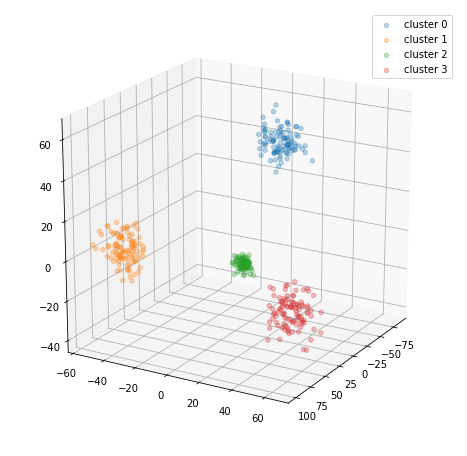

In [92]:
if DATA_LOW_DIM == 2:
    plt.figure(figsize = (8,8)) # задаем размер картинки
    for i, data_by_label in enumerate(data_low_dim_by_labels):
        # plt.scatter отрисовывает множество точек, в i-ый аргумент нужно передавать набор всех
        # i-ых координат.
        
        # label определяет, какие будут подписи на графике
        
        # alpha задаёт прозрачность. если данных много, это поможет определить крурные скопления объектов, ибо
        # в крупных скоплениях цвет будет насыщенней
        
        plt.scatter(*[data_by_label[:, j] for j in range(2)], label="cluster {}".format(i), alpha=0.3)
elif DATA_LOW_DIM == 3:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    for i, data_by_label in enumerate(data_low_dim_by_labels):
        ax.scatter(*[data_by_label[:, j] for j in range(3)], label="cluster {}".format(i), alpha=0.3)
        # axim - угол поровота для трехмерных картинок
        ax.view_init(elev=20, azim=30)
plt.legend()
plt.show()

Можно написать функцию, которая принимает угол и рисует трехмерную картинку, а потом покрутить его.

In [94]:
def draw(angle):
    if DATA_LOW_DIM == 3:
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(111, projection='3d')
        for i, data_by_label in enumerate(data_low_dim_by_labels):
            ax.scatter(*[data_by_label[:, j] for j in range(3)], label="cluster {}".format(i), alpha=0.3)
            ax.view_init(elev=20, azim=angle)
        plt.legend()
        plt.show()

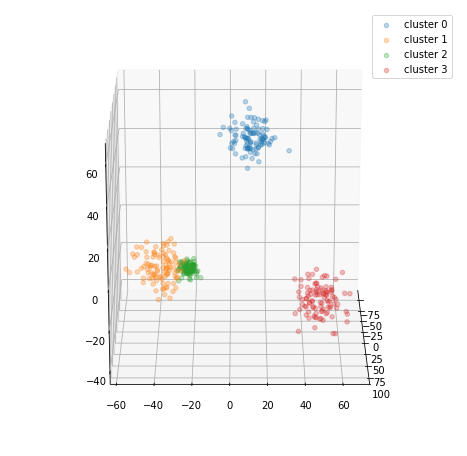

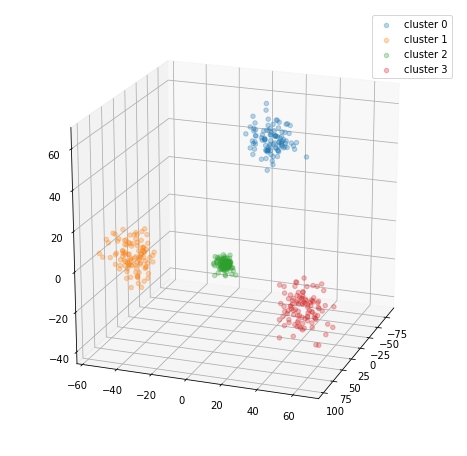

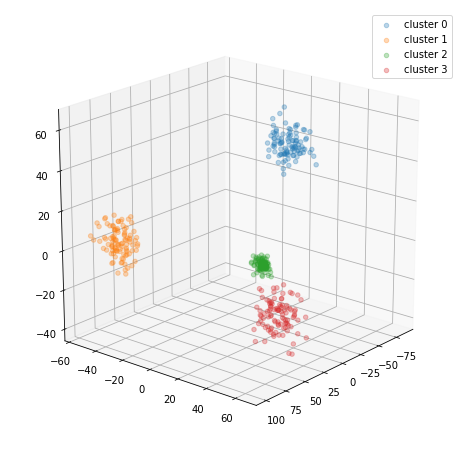

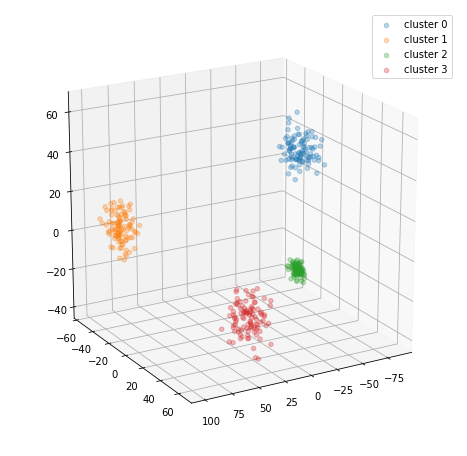

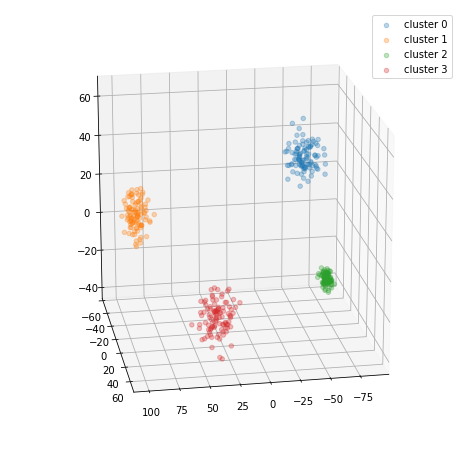

In [97]:
for angle in range(0, 100, 20):
    draw(angle)